In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

plt.style.use('seaborn-colorblind')

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

from acquire_walkthrough import get_iris_data
from prepare_walkthrough import prep_iris

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = get_iris_data()
encoder, train, test = prep_iris(df)
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width
30,0,4.8,3.1,1.6,0.2
36,0,5.5,3.5,1.3,0.2
29,0,4.7,3.2,1.6,0.2
55,1,5.7,2.8,4.5,1.3
118,2,7.7,2.6,6.9,2.3


## Exercise 2

Create a swarmplot using a melted dataframe of all your numeric variables. 

The x-axis is the variable name, the y-axis is the measure. 

Add another dimension using color to represent species. Document takeaways from this visualization.

In [3]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width
30,0,4.8,3.1,1.6,0.2
36,0,5.5,3.5,1.3,0.2
29,0,4.7,3.2,1.6,0.2
55,1,5.7,2.8,4.5,1.3
118,2,7.7,2.6,6.9,2.3


## What is .melt?

Melt transforms "wide" data into "long" data.

Specifically, melt is converting all the columns other than "species" into a key => value set of columns. 

The "measurement" column is the key that holds the original column name. The "value" column holds that measurement.

A melted column is called "long", and that means that each row is a single observation (depending on how you label an 'observation').

An observation in our melted dataframe is single measurement of a single characteristic.

In [4]:
df_melt = pd.melt(train, "species", var_name="measurement")

In [5]:
df_melt.head()

,species,measurement,value
0,0,sepal_length,4.8
1,0,sepal_length,5.5
2,0,sepal_length,4.7
3,1,sepal_length,5.7
4,2,sepal_length,7.7


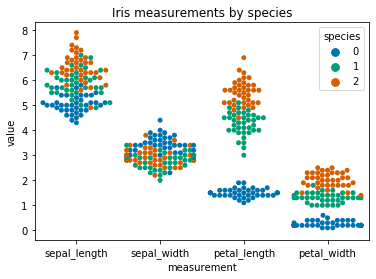

In [6]:

plt.title("Iris measurements by species")
sns.swarmplot(x="measurement", y="value", data=df_melt, hue="species")

plt.show()

Takeaways:
- Looks like petal length and petal width are more clearly defined predictors of species rather than sepal information

## Exercise 3
Create 4 subplots (2 rows x 2 columns) of scatterplots

- sepal_length x sepal_width
- petal_length x petal_width
- sepal_area x petal_area
- sepal_length x petal_length
- Make your figure size 14 x 8. What are your takeaways?

In [7]:
# Looks like we'll have to calculate sepal area to see if it's insightful
train["sepal_area"] = train.sepal_length * train.sepal_width
train["petal_area"] = train.petal_length * train.petal_width

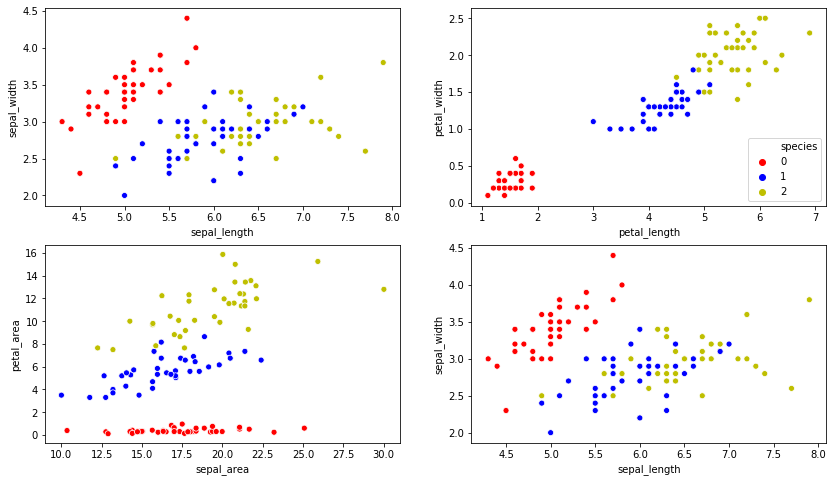

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,8))
plt.style.use('seaborn-colorblind')

# First subplot
plt.subplot(2, 2, 1)
sns.scatterplot(x="sepal_length", y="sepal_width", data=train, hue="species", palette=["r", "b", "y"], legend=False)

# Second subplot
plt.subplot(2, 2, 2)
sns.scatterplot(x="petal_length", y="petal_width", data=train, hue="species", palette=["r", "b", "y"])
plt.legend(loc='lower right')

# Third subplot
plt.subplot(2, 2, 3)
sns.scatterplot(x="sepal_area", y="petal_area", data=train, hue="species", palette=["r", "b", "y"], legend=False)

# Forth subplot
plt.subplot(2, 2, 4)
sns.scatterplot(x="sepal_length", y="sepal_width", data=train, hue="species", palette=["r", "b", "y"], legend=False)

plt.show()

## Exercise 4

Create a heatmap of each variable layering correlation coefficient on top.

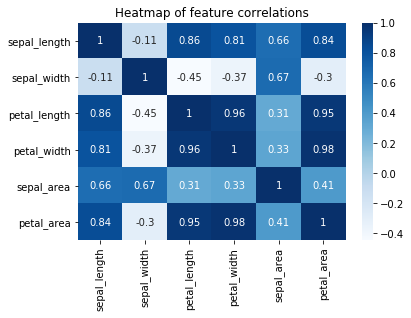

In [9]:
plt.title("Heatmap of feature correlations")
sns.heatmap(train.drop(columns="species").corr(), annot=True, cmap="Blues")
plt.show()

## Exercise 5

Create a scatter matrix visualizing the interaction of each variable

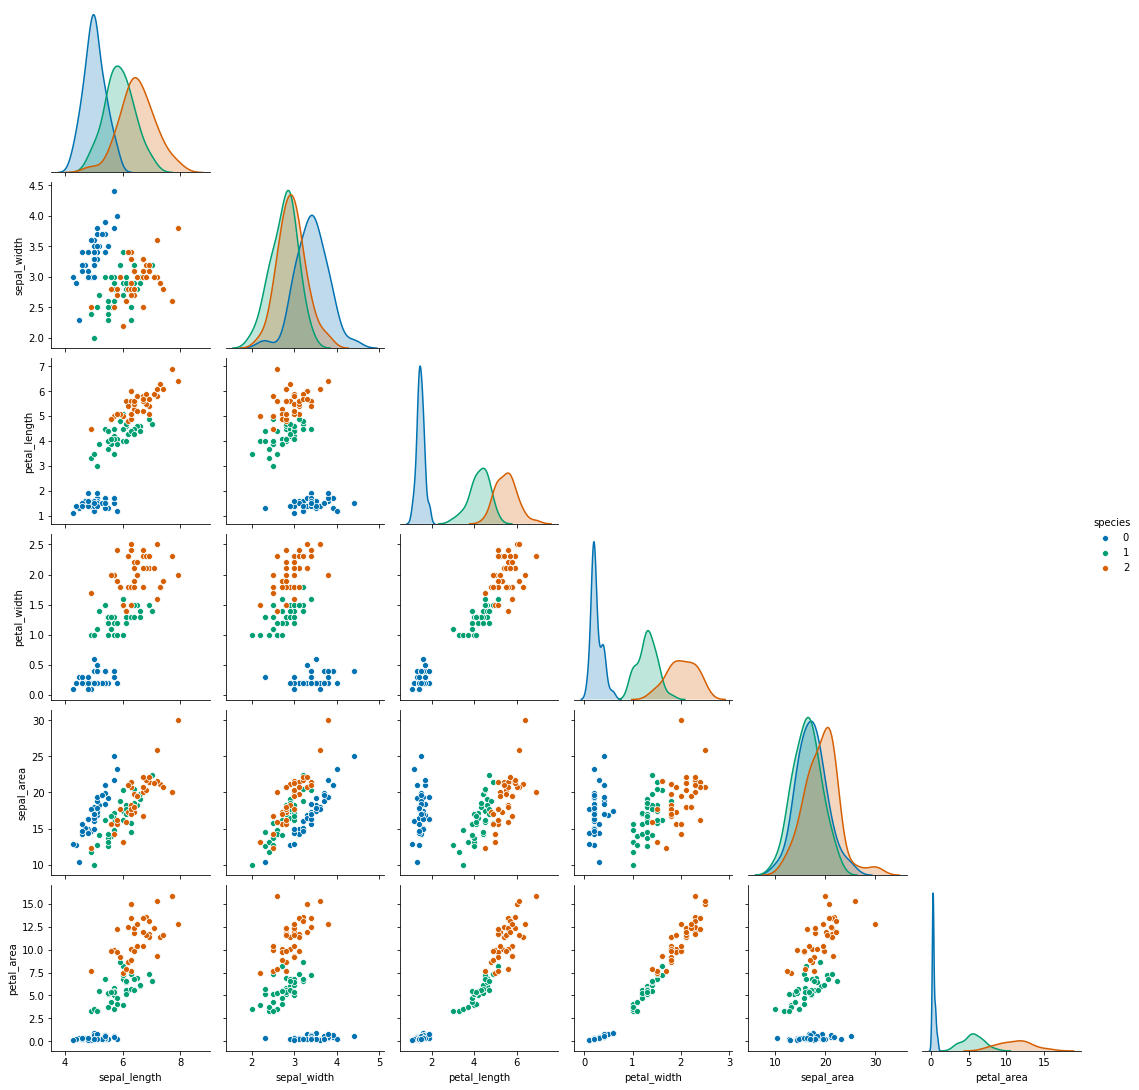

In [10]:
sns.pairplot(train, hue="species", corner=True)
plt.show()

## Exercise 6
- Is the sepal length significantly different in virginica compared to versicolor? Run an experiment to test this.
- Must include null hypothesis, alternative hypothesis, t-test, results, and summary
- $H_0$: the difference in sepal length between virginica and versicolor is insignificant.
- $H_a$: the difference in sepal length between virginica and versicolor is substantial.
- We will test if the sepal length of virginica is significantly different than that of the versicolor.
- If there is difference, then variable sepal_length is a good choice to keep as a feature.
- We can use a t-test here, as sepal_length is somewhat normally distributed.

In [11]:
# Null hypothesis is that sepal length in virginica and versicolor are insignificantly different (close to the same)

In [12]:
# # We'll need to decode the species name
train["species_name"] = encoder.inverse_transform(train.species)
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,species_name
30,0,4.8,3.1,1.6,0.2,14.88,0.32,setosa
36,0,5.5,3.5,1.3,0.2,19.25,0.26,setosa
29,0,4.7,3.2,1.6,0.2,15.04,0.32,setosa
55,1,5.7,2.8,4.5,1.3,15.96,5.85,versicolor
118,2,7.7,2.6,6.9,2.3,20.02,15.87,virginica


In [13]:
virginica = train[train.species_name == "virginica"]
versicolor = train[train.species_name == "versicolor"]

t, p = scipy.stats.ttest_ind(virginica.sepal_length, versicolor.sepal_length)

# Let's go with an alpha of .01 for a 99% confidence level
alpha = .01

if p < alpha:
    print("We reject the null hypothesis that there is no significant difference between sepal length between virginica and versicolor species.")

We reject the null hypothesis that there is no significant difference between sepal length between virginica and versicolor species.
